<a href="https://colab.research.google.com/github/alexandrealvees/Quarentena/blob/master/quarentena_de_dados_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 01

##Introdução

Olá seja bem-vinda ou bem-vindo ao **notebook da aula01**, nesta aula vamos realizar nossa primeira análise de dados e no final já seremos capazes de tirar algumas conclusões.

Nós estaremos desenvolvendo nosso projeto aqui no google colaboratory, assim podemos mesclar células contendo textos em formato markdown e células de código, além disso você não precisar instalar nada na sua máquina. Então que tal começar testando algumas linhas de código.

Nesta primeira célula estamos realizando um ```print()```, lembre-se que esta função python imprime a string que estamos passando como parâmetro, então  o retorno é exibido logo abaixo da célula com código.

In [0]:
#Iniciando o kernel
print("Alexandre Alves")
print("Alexandre")

Alexandre Alves
Alexandre


Agora vamos analisar a proxima célula de código. 

Aqui estamos fazendo uma atribuição de variável, conforme dito em aula, as atribuições não tem retorno, assim, diferente da célula anterior não temos um *output* logo abaixo do código.

In [0]:
nome_do_filme = "TOtoro, o filme"

Agora que criamos a variável ```nome_do_filme```, podemos reutilizá-la, por exemplo na função ```print```, para assim imprimir a *string* "Totoro, o filme".

In [0]:
print(nome_do_filme)

TOtoro, o filme


In [0]:
nome_do_filme

'TOtoro, o filme'

## Lendo os dados do MovieLens

Nosso primeiro passo foi conhecer e realizar um "hello-world" no colab, agora chegou a hora de importar os dados para o notebook e começar as análises.

Vamos importar a biblioteca [pandas](https://pandas.pydata.org/), um poderoso projeto open source para análise de manipulação de dados. O primeiro passo é ler uma base de dados e podemos fazer isso com o comando ```pd.read_csv()```.

Estamos lendo um arquivo **CSV** (Comma-separated values), neste tipo de arquivo os valores são separados por vírgulas e podem ser abertos em outras ferramentas como excel e google-sheet. CSV não é o único formato lido pelo pandas, temos o ```pd.read_excel()``` que lê arquivos **xlsx** entre diversos outros formatos, você pode encontrar mais informações na seção de [input/output da documentação](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

Depois de ler o dataset, nós trocamos os nomes das colunas pelos termos em português, logo em seguida utilizamos o método ```filmes.head()``` para visualizar as primeiras 5 linhas do nosso dataframe. Outra forma de visualizar as informações dos dados é utilizando o método ```filmes.sample()```, se você tentar, vai verificar que ele retorna uma linha aleatória do seus dados. Para escolher aleatoriamente mais de 1 linha, por exemplo 5, é só passar esse valor desejado como parâmetro (```filmes.sample(5)```). 

In [0]:
#Importanto a biblioteca
import pandas as pd

In [0]:
# criando um dataframe lendo os dados do githubgist
filmes = pd.read_csv("https://raw.githubusercontent.com/alexandrealvees/Quarentena/master/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Há pouco falamos para consultar a documentação para obter mais informações, mas será que é realmente preciso sair do notebook para tirar algumas dúvidas mais simples? 

Os notebooks facilitam a nossa vida podendo consultar o docstring das funções e métodos, rodando a célula com um **?** na frente da chamada, uma view é aberta com as informações resumidas. Veja a seguir alguns exemplos.

In [0]:
# Lendo a documentação de um metódo/atributo 
?filmes.head

In [0]:
# Lendo a documentaçao de um 
?filmes


A base de dados que usamos até o momento contém o nome do filme, ano de lançamento e gêneros. O MovieLens conta com outras informações que estão em bases separadas, uma delas é a de avaliações. 

Agora vamos analisar um pouco melhor o dataset de avaliações.

In [0]:
# avaliações e um dataseries
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alexandrealvees/Quarentena/master/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.00,964982703
1,1,3,4.00,964981247
2,1,6,4.00,964982224
3,1,47,5.00,964983815
4,1,50,5.00,964982931


Para visualizar algumas linhas estamos usando o ```.head()```, como ela mostra apenas as 5 primeiras linhas não sabemos qual é a quantidade de linhas que temos. Para descobrir a "forma" dos nossos dados podemos utilizar o ```avaliacoes.shape```, retornando uma [tupla](https://www.alura.com.br/artigos/conhecendo-as-tuplas-no-python), onde o primeiro termo indica o número de linhas e o segundo o número de colunas.

In [0]:
avaliacoes.shape

(100836, 4)

In [0]:
len(avaliacoes)

100836

Vamos substituir os nomes das colunas de inglês para português e entender o que são essas colunas. 

usarioId => ID para para usuário que votou em determinado filme.

filmeId => ID para identificar um filme votado.

nota => A nota dada para pelo usuário para o respectivo filme.

momento => A data da votação que não está formatada como data

Como cada linha contém um voto para o respectivo filme é de se esperar que um filme tenha diversos votos, mas repare que nas 5 primeiras linhas temos o filme **1, 3, 6, 47, 50**. Mas e se eu quiser analisar apenas as notas do filme 1, como posso separar essa informação?



In [0]:
# Mudando o nome das colunas
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.00,964982703
1,1,3,4.00,964981247
2,1,6,4.00,964982224
3,1,47,5.00,964983815
4,1,50,5.00,964982931


Uma forma para "separar" as informações apenas do **filmeId 1** é chamando o método ```avaliacaoes.query("filmeId==1")```, esse método retornará apenas as linhas para quais a expressão booleana, "filmeId==1", for verdadeira.

Tendo as informações do **filmeId 1** podemos chamar o ```avaliacoes_do_filme_1.describe()```, para analisar as estatítiscas gerais dos dados.

In [0]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.00,964982703
516,5,1,4.00,847434962
874,7,1,4.50,1106635946
1434,15,1,2.50,1510577970
1667,17,1,4.50,1305696483


In [0]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.00,215.00,215.00,215.00
mean,306.53,1.00,3.92,"1,129,834,676.65"
std,180.42,0.00,0.83,"239,316,282.99"
min,1.00,1.00,0.50,"829,322,340.00"
25%,155.50,1.00,3.50,"877,922,393.50"
50%,290.00,1.00,4.00,"1,106,854,640.00"
75%,468.50,1.00,4.50,"1,348,522,728.50"
max,610.00,1.00,5.00,"1,535,709,666.00"


Caso queira uma estatística particular, podemos apenas chamar o método desajado, repare abaixo como calculamos apenas a média das avaliações do **filmeId 1**.

In [0]:
avaliacoes_do_filme_1.mean()

usuarioId             306.53
filmeId                 1.00
nota                    3.92
momento     1,129,834,676.65
dtype: float64

Calculamos as estatísicas apenas para o **filmeId 1**, mas também podemos chamar o método ```.describe()``` para a base completa (avaliacões).

In [0]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,"100,836.00","100,836.00","100,836.00","100,836.00"
mean,326.13,"19,435.30",3.50,"1,205,946,087.37"
std,182.62,"35,530.99",1.04,"216,261,036.00"
min,1.00,1.00,0.50,"828,124,615.00"
25%,177.00,"1,199.00",3.00,"1,019,123,866.00"
50%,325.00,"2,991.00",3.50,"1,186,086,662.00"
75%,477.00,"8,122.00",4.00,"1,435,994,144.50"
max,610.00,"193,609.00",5.00,"1,537,799,250.00"


ok, nós calculamos um tanto de coisa usando .describe() e .mean(), mas a informação que realmente queremos é a média da nota. Então o ponto é, como calcular a média apenas das notas?

A primeira coisa que precisamos fazer é selecionar apenas as informações de notas. Usando uma estrutura muito parecida com a de [chave-valor dos dicionários python](https://www.alura.com.br/artigos/trabalhando-com-o-dicionario-no-python).

Com o comando avaliacoes["nota"], obtemos os valores da coluna nota (repare que o tipo retornado é uma Série pandas, por isso o index de cada nota é mantido). Para calcular a média de todas as notas executamos avaliacoes["notas"].means()

In [0]:
avaliacoes["nota"]

0        4.00
1        4.00
2        4.00
3        5.00
4        5.00
         ... 
100831   4.00
100832   5.00
100833   5.00
100834   5.00
100835   3.00
Name: nota, Length: 100836, dtype: float64

In [0]:
avaliacoes["nota"].mean()

3.50

Nós calculamos uma média geral, uma média para o filmeId 1. Agora eu quero calcular a média das notas para todos os filmes, podemos fazer isso usando o método ```.groupby(filmeId)```, o parâmetro passado é para indicar qual coluna ele deve utilizar para "agrupar" os dados. Depois só calcular a média como fizemos anteriormente.



In [0]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1   3.92
2   3.43
3   3.26
4   2.36
5   3.07
Name: nota, dtype: float64

Temos as notas médias calculadas, mas agora precisamos juntar as informações de notas médias com a base de dados **filmes**.

Poderíamos criar uma nova coluna e atribuir a váriável `notas_medias_por_filme`, de forma direta:

```filmes["nota_media"] = notas_medias_por_filme```

Como discutimos em aula, essa não é uma boa prática pois precisamos garantir que a nota média seja do respectivo filme.

Para garantir essa condição vamos utilizar o ```.join()```, criando um novo dataframe (```filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")```). 

Veja como fazer, nas células a seguir.

In [0]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [0]:
notas_medias_por_filme

filmeId
1        3.92
2        3.43
3        3.26
4        2.36
5        3.07
         ... 
193581   4.00
193583   3.50
193585   3.50
193587   3.50
193609   4.00
Name: nota, Length: 9724, dtype: float64

In [0]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


Agora que temos as médias, que tal visualizar o nosso dataframe ordenado pela nota de forma decrescente?

In [0]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.00
8107,100556,"Act of Killing, The (2012)",Documentary,5.00
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.00
9094,143511,Human (2015),Documentary,5.00
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.00
4251,6201,Lady Jane (1986),Drama|Romance,5.00
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.00
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.00
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.00
9122,145994,Formula of Love (1984),Comedy,5.00


Fizemos um tanto de análise e manipulação de dados interessante, não é?

Mas diz a verdade, você está sentindo falta daquele gráfico que todo cientista de dados adora =D, então bora plotar nosso primeiro gráfico!

O pandas facilita muito o plot de alguns gráficos simples, apenas selecionamos a informação que gostaríamos de visualizar e chamamos o método ```.plot()```

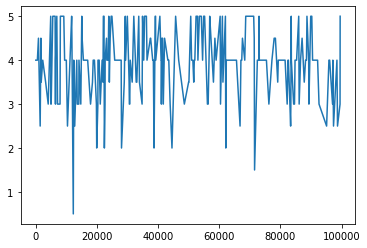

In [0]:
avaliacoes.query("filmeId == 1")["nota"].plot()

Por padrão o método plotou um gráfico de linhas, o que não é adequado para os dados que estamos analisando.

Precisamos mudar o tipo de gráfico para realizar uma análise mais adequada, para fazer isso apenas alteramos o parâmetro **kind** do método ```.plot```. Vamos plotar um [histograma](https://pt.wikipedia.org/wiki/Histograma) rodando a célula a seguir.

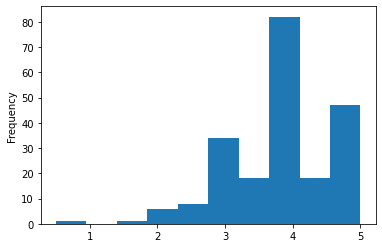

In [0]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

Legal, agora temos uma visualização muito mais agradavel de analisar. Compare com o gráfico de linhas, qual você acha melhor para análise? 

P.S: Deixar de usar o gráfico de linhas, não significa que sejá uma visualização ruim. Apenas quer dizer que nossos dados não tem características ideias para serem visualizados como um *line plot*, agora pense em uma [série temporal](https://pt.wikipedia.org/wiki/S%C3%A9rie_temporal). **Você acha que o gráfico de linhas ainda seria uma má ideia?**

Antes de analisar o histograms de outros filmes, quero colocar um título na imagem. Vamos ver como podemos fazer isso!


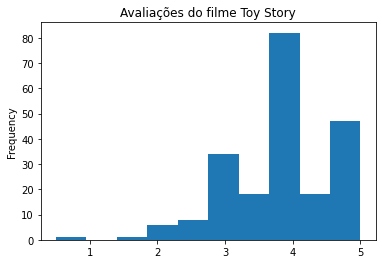

In [0]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Story")

Claro que python tem outras ferramentas muito poderosas para manipular gráficos, uma delas é o [matplotlib](https://matplotlib.org/).

Que tal experimentar um pouquinho esta poderosa ferramenta? 

Vamos importar a lib e adicionar título no gráfico usando o matplotlib, veja como fica na célula a seguir.

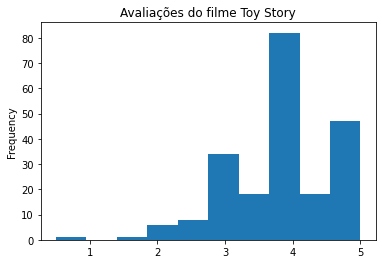

In [0]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

Agora que aprendemos a criar um histograma e manipular os gráficos, vamos plotar informações de outros filmes e realizar uma análise desses gráficos?

Vamos plotar o histograma do filme Jumanji e da animação Liga da justiça: Doom.

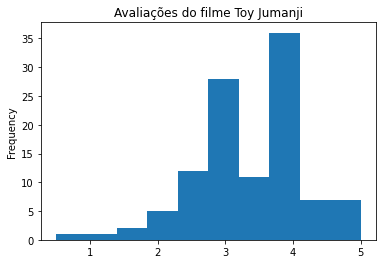

In [0]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Jumanji")

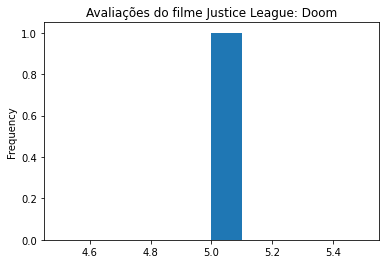

In [0]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',
                                                   title="Avaliações do filme Justice League: Doom")

Agora que temos os gráficos, chegou a hora de analisar.

A primeira coisa que preciso saber é o que cada eixo do meu gráfico significa. Então, eixo **x** mostra a nota, enquanto eixo **y** a frequência das notas (quantas vezes determinada nota foi dada). 

Entendido nosso gráfico, vamos contextualizar o cenário que estamos analisando:

 - Temos 3 filmes, dois muito populares (Toy story e Jumanji) e outro que nenhuma pessoa presente no momento da aula conhecia (animação da liga da justiça). O ponto que chamou a atenção, foi que a animação tinha média de nota maior que dois filmes, aparentemente mais popular, Jumaji e Toy Story. **Será que a animação é um filme tão bom assim?**


Dado esse cenário a primeira coisa que me chama a atenção é a animação da liga da justiça ter média de nota igual a 5. Ao analisar o histograma do respectivo filme, verificamos que ele só teve uma avaliação igual a 5, logo, fica evidente que a **quantidade de votos é um aspecto importante na avaliação das médias**. Com apenas uma avaliação, não conseguimos garantir que o filme é realmente bom, tornando a avaliação muito "volátil". Imagina que Liga da Justiça receba mais uma avaliação, com nota 0, assim a média seria 2.5. Apenas com mais essa avaliação o filme passaria a ser considerada um "pior" que Jumanji e Toy Story.

Outro ponto interessante é comparar o histograma de Toy Story e Jumanji, ambos tem médias "relativamente próximas". Mas repare que a distribuição de notas são diferentes, Toy Story recebe mais notas 5 e 4 que qualquer outra nota, enquanto Jumanji recebe mais notas 4 e 3, assim concluímos que a **distribuição das notas também é um fator importante na avaliação das médias**.(Se ficar alguma dúvida sobre esse tema reveja o exemplo que o instrutor apresenta no final na aula) 


Com isso nós fechamos a nossa primeira aula do **#quarentenadados**, viu quanta coisa aprendemos? Que tal colocar isso em prática?


**Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês**.


Até a próxima aula!








## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [0]:
#criar uma variável e setar nelas os valores dos filmes
#sem avaliação
filmes_sem_nota = filmes[~filmes["filmeId"].isin(avaliacoes["filmeId"].unique())]
filmes_sem_nota

,filmeId,titulo,generos
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


In [0]:
#usar a função len para filtrar o número de filmes sem avaliações
len(filmes_sem_nota)

18

In [0]:
#listar os filmes sem nota
filmes_sem_nota

,filmeId,titulo,generos
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [0]:
#rename modifica o nome da coluna
filmes_com_media = filmes_com_media.rename(columns={"nota": 'nota_media'})

In [0]:
# mostrar colunas após terem sido renomeada
filmes_com_media.columns

Index(['filmeId', 'titulo', 'generos', 'nota_media'], dtype='object')

## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [0]:
qtd_votos = filmes.join(avaliacoes.groupby("filmeId")["nota"].count(), on= "filmeId")
qtd_votos.head(10)

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.00
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.00
2,3,Grumpier Old Men (1995),Comedy|Romance,52.00
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.00
4,5,Father of the Bride Part II (1995),Comedy,49.00
5,6,Heat (1995),Action|Crime|Thriller,102.00
6,7,Sabrina (1995),Comedy|Romance,54.00
7,8,Tom and Huck (1995),Adventure|Children,8.00
8,9,Sudden Death (1995),Action,16.00
9,10,GoldenEye (1995),Action|Adventure|Thriller,132.00


In [0]:
#ordenando os filmes
qtd_votos.sort_values(by="nota", ascending=False)

,filmeId,titulo,generos,nota
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.00
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317.00
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.00
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.00
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.00
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,nan
5824,32160,Twentieth Century (1934),Comedy,nan
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,nan
5957,34482,"Browning Version, The (1951)",Drama,nan


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [0]:
#função de arredondar e a round
filmes_com_media["nota_media"] = filmes_com_media["nota_media"].round(2)
filmes_com_media["nota_media"].head()

0   3.92
1   3.43
2   3.26
3   2.36
4   3.07
Name: nota_media, dtype: float64

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [0]:
lista_generos = filmes_com_media["genero"].str.split("|", expand=True)
lista_generos.stack().unique()


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [0]:
#essa foi difícil tive que da uma olhada no da galera
todos_generos = lista_generos.melt().groupby("value").count().sort_values("variable", ascending=False)
todos_generos

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

In [0]:
import matplotlib.pyplot as plt
todos_generos.plot.bar()
plt.title('Grafico por genêros de filmes')
plt.xlabel('Generos')
plt.ylabel('Visualizações')
plt.show()


# Aula 02

##Introdução

Nesta aula vamos estudar com mais profundidade as técnicas de centralidade, conhecer algumas boas práticas de visualização de dados e o famoso Boxplot.

Para inciar vamos precisar resolver alguns dos desafios deixados na **aula 01** (Caso não tenha tentado resolver os desafios, recomendo tentar algumas vezes antes de olhar as repostas). Começando pelo exercício 05, onde precisamos segregar os gêneros de cada um dos filmes contidos na base de dados do **Movie Lens**.

Vamos relembrar como os dados estavam configurados.

In [0]:
filmes.head()

Temos os títulos e uma coluna com os respectivos gêneros, todos em uma única coluna, cada *label* é separada com um **|** (Adventure|Children|Fantasy) sendo do tipo *string*. 

Para solucionar nosso problema precisamos separar cada um dos gêneros para então realizar a contagem. Existe várias formas de resolver este problema, por exemplo, desde métodos inputos das *strings* até as **regex**, mas como estamos usando o pandas já temos algo para facilitar nosso processamento dos dados. 

Vamos aplicar o método e logo em seguida explicar a saída geranda.

In [0]:
filmes["generos"].str.get_dummies('|')

Nossa, uma linha de código gerou essa tabelona cheia de linhas, colunas e números.


Como você percebeu a saída é um [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), cada linha corresponde a respectiva linha da coluna gênero, cada coluna corresponde a um gênero (repare que cada gênero **único** virou uma coluna no DF). O que você deve estar se perguntando é como os valores **0/1** são preenchidos?.

Para explicar, vamos pegar os gêneros do filme **Jumanji**, **Adventure|Children|Fantasy**, na coluna dos repectivos gêneros (dataframe gerado por ```filmes["generos"].str.get_dummies('|')```) o valor será **1**, para todos os outros gêneros, que não são gêneros do filme Jumanji, vale **0**. Em suma, se o nome da coluna pertence a algum gêreno do respectivo filme, o valor será **1** caso contrário 0 (Se ainda não ficou claro, pegue alguns filmes e confira os resultas na tabela anterior).


Até aqui resolvemos uma parte do problema, agora precisamo somar quantos **1** cada coluna tem.



In [0]:
filmes["generos"].str.get_dummies('|').sum()

Ótimo, resolvemos o desafio e agora temos quantas vezes cada gênero aparece. Assim, fica fácil de reponder perguntar como, qual o gênero com mais filmes produzidos? Qual o menos? Qual o segundo? (Lembrando que o dado está restrito as informações do movie lens)

Se você tentou reponder, deve ter notado que não foi tão fácil assim, as informações não estão ordenadas e toda hora você precisa percorrer a tabela para fazer comparações. Nós podemos melhor isso ordenando as informações.

In [0]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

Maravilha, agora tudo ficou mais fácil! 

Conseguimos responder as perguntas anterior sem grandes dificuldades. Mas ainda podemos melhor mais a forma de expor nossa informação, não acha? 

Que tal uma imagem para visualizar? (Desafio 07 da aula 01)

In [0]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot()

Iniciamos com o plot padrão do pandas, e como percebemos não adianta só plotar uma imagem, é preciso que faça sentido para a informação que queremos analisar, um gráfico de linhas não está fazendo muito sentido!

Temos um gráfico muito conhecido que sempre encontramos por aí, o famoso gráfico de pizza ou torta. 

Já que ele é tão famoso talvez seja uma boa ideia tentar!

In [0]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Categorias de filmes e suas presenças relativas',
    figsize=(8,8))
plt.show()

E aí o que você achou? 

Algo que fica evidente neste gráfico é que **Drama, Comedy, Thriller, e Action** tem proporções "grandes", mas qualquer outra análise fica complicada. 

Primeiro, as cores começa a se repetir e isso não é o ideial.

Segundo, repare nos gêneros com menos filmes,consegue tirar alguma informação de lá? é muito difícil de analisar.

Quarto, vamos tentar comparar **thriller e Action**, qual está presente em mais filmes? Difícil responder, quando estamos trabalhando com gráficos tipo esse fazemos comparações entre área, não somos bons nisso.


Por fim, o importante de uma visualização é que ela seja **"transparente"** ao intuíto de nossa análise. Ou seja, estamos querendo analisar as informações de quantidade, comparando as labels de forma geral e evidênciando de maneira clara as diferenças entre elas (proporções).

Portanto, o gráfico de pizza não torna as comparações claras, sendo assim uma má ideia. 

Vamos construir juntos uma solução mais adequada!


In [0]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

Mudamos da pizza para a barra, alterando apenas o parâmetro kind do método.

 Veja como o gráfico de barra torna a análise mais simples, logo de cara a diferença entre **Drama e Comedy**, comparado aos demais gêneros fica evidênte. No gráfico de pizza era super difícil comparar **Thriller e Action**, agora a comparação ficou fácil e conseguimos perceber o quão perto estão uma da outra.

A interpretação dos dados melhorou muito com essa visualização, mas podemos melhorar ainda mais. O que queremos é tornar evidênte os gêneros que tem a maior participação nos filmes em geral, ou seja transparecer através da imagem uma visão geral de proporcionalidade. Para tprnar evidênte essa informação vamos utilizar algo "semelhante" a um [mapa de calor](https://en.wikipedia.org/wiki/Heat_map).

In [0]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Já, já explicamos o que foi feito em toda imagem, por agora repare como a imagem passa muito mais informação. Conseguimos comparar de forma fácil entre os gêneros e através do **mapa de calor** (gêneros com maior número tem um verde muito mais forte, gêneros com menor número é praticamente transparente) evidênciamos quais são as labels com maior participação, médias e insignificantes. Toda essa informação em uma única imagem!

Bom, agora vamos entender como foi o código.

Primeiro, não plotamos mais a imagem com o `.plot()` do pandas, vamos precisar de uma biblioteca de visualização mais poderosa para configurar nossa imagem, utilizamos o [seaborn](https://seaborn.pydata.org/).

Segundo, chamamos o barplot do **seaborn**, adicionando uma **paleta de cores** com efeito de mapa de calor (parâmetro pallette), no parâmetro `n_color` de `sns.color_palette()` adicionamos **+4** para que a última barra não seja totalmente transparente.

Terceiro, também adicionamos o **sns.set_style("whitegrid")** para que todos os gráficos tenham a **linha de grade do eixo X** evidênte, facilitando a comparação entre as barras.

In [0]:
import seaborn as sns

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Por fim, mudamos o tamanho da imagem com o **figsize** do método`plt.figure()`. Assim, temos um gráfico com muitas informações e agradável de analisar.


In [0]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Conseguimos analisar e tirar diversas conclusões trabalhando com a visualização dos gêneros. Será que conseguimos utilizar visualizações para entender melhor as notas de um filme?

Vamos relembrar alguns pontos que já discutimos e nos aprofundar nas análises de notas para tirar conclusões mais sofisticadas.

Na **aula 01** calculamos as notas médias por filmes, vamos dar uma olhada no resultado.

In [0]:
filmes_com_media.head()

Como vimos, olhar apenas as médias pode ser um problema e para interpretar um pouco melhor os dados usamos o histograma das ntoas para comparar alguns filmes. Por exemplo, **Toy Story e Jumanji**

In [0]:
notas_do_filme_1 = avaliacoes.query("filmeId==1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

In [0]:
notas_do_filme_1 = avaliacoes.query("filmeId==2")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

ToyStory e Jumanji tem médias relativamente próximas mas com comportamento de notas diferentes, então, para nosso exemplo, as médias ajudam mas esconde informações importântes sobre os dados. 

Lembra o exemplo que o Guilherme Silveira deu em aula comparando os sálarios de uma cidade? Olhando apenas para as médias dos salários não conseguimos evidênciar a desigualdade que havia entre as cidades. 

```python
#Cidada A
populacao = 1000
salario = 1100

media = 1100

#Cidade B
populacao = 1000
salario1 = 1000000
salario999 = 100

media = (salario1 * 1 + salario999 * 999) / 1000
media = 1099.00
```

P.S: Se tiver dúvidas reveja essa parte da aula e tente enteder o problema da média.


Outras métrica que pode nos ajudar a interpretar melhor os dados são os quatis, principalmente a [mediana](https://pt.wikipedia.org/wiki/Mediana_(estat%C3%ADstica))

Vamos buscar dois filmes com médias muito mais próximas que Toy Story e Jumanji, para analisar outras métricas além das médias.

In [0]:
filmes_com_media.sort_values("nota_media", ascending=False)[2450:2500]

Bom, ordenando os filmes pela nota médias e [fatiando](https://www.alura.com.br/artigos/listas-no-python) os dados entre 2450 e 2500, temos uma região onde as médias são semelhates e provavelmente não tem apenas um único voto. Vamos comparar o fime *Wizard of Oz, **filmeId=919** e *Little Miss Sunshine* **filmeId=46578**.

Para não precisar copiar e colar toda hora o plot dos gráficos vamos criar nossa primeira função, assim passamos apenas o FilmeId e temos as informações desejadas.

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

Definimos nossa [função plot em python](https://www.caelum.com.br/apostila-python-orientacao-objetos/funcoes/#parmetros-de-funo) e repare que estamos usando **F-string** para fazer a interpolação dos dados, se tiver tiver dúvida veja essa [explicação no fórum da alura](https://cursos.alura.com.br/forum/topico-para-que-serve-o-print-f-no-python-77720).

Agora precisamos chamar a função!

In [0]:
#Mágico de Oz
plot_filme(919)

A função plot, além de gerar o histograma também retorna algumas estatísticas. Vamos chamar a função agora para o filme *Little Miss Sunshine*.

In [0]:
plot_filme(46578)

Ótimo, agora com essas informações conseguimos comparar melhor ambos os filmes. Analisando os histogramas vemos que muitas pessoas realmente amam **Wizard of Oz** (notas 5), mas também temos pessoas que não gostam de formal alguma (notas 1). Quando comparamos com a histograma temos um do **Little mis sunshine**, percebemos que os resultados se concentra entre valores medianos(notas 2.5-4). 

O que confirma nossa análise aqui é comparar os **25% 50% e 75%**. 50% é o valor da mediana, e ambos filmes tem mesma mediana, mas 25% e 75% são diferentes. Se você lembra lá da estatísitca esses são os [**1° 2° e 3° quartis**](https://pt.wikipedia.org/wiki/Quartil). 

Olha, mesclar os gráficos com as estatísticas ajuda a interpretar melhor os dados. Mas o que precisamos é uma imagem que nos ajude a interpretar os dados ainda melhor, o gráfico que nos ajuda neste caso é o **Boxplot**. Vamos adaptar nossa função para conseguir plotar o boxplot e interpretá-lo.

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

plot_filme(919)

E aí, viu como é simples criar criar um [boxplot com o pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html)?

Apenas chamamos o método ```.plot.box()```, agora o que precisamos fazer é interpretar este gráfico.

Vamos focar primeiro na "caixa" a linha verde que divide a caixa em dois é a mediana (compare com as estatísticas geradas pelo discribe()), a parte superior da caixa é o 3° Quartil (75%) e a parte inferior é o 1° Quartil (25%).

Agora repare nos limites inferior e superior, represetados pelas extremidades em preto. Por coincidência, nesta imagem os limites inferior e superior são equivalentes ao ponto de máximo e mínimo, mas nem sempre será assim, pois esse limite superir e inferior são calculados e dependem de Q1 e Q3. Algumas vezes os limites podem sobrepor os extremos das "caixas" e isso geralmente ocorre quando temos uma quantidade pequena de dados.

Como tivemos sobreposição do limite superior vamos calcular o boxplot de outro filme, para analisar o resultado.


In [0]:
plot_filme(46578)

Olha que legal, diferente do primeiro boxplot, neste os limites superiores não se sobrepõe e temos uma informação a mais, no caso temos essa bolinha localizada em **y=1**. A "bolinha" chamamos de valor discrepante, por ir além dos limites inferior e superior (chamamos na aula de [outliers](https://pt.wikipedia.org/wiki/Outlier), existem várias formas de calcular os outliers, mas no nosso caso esses são os outliers do boxplot).

Não vamos entrar em todos os detalhes do boxplot mas recomendo a explicação do [wikipedia](https://pt.wikipedia.org/wiki/Diagrama_de_caixa), ela é muito completa, cheias de exemplo e imagens para facilitar o entendimento.

Agora comparando os boxplot dos dois filmes deixa muito mais evidente as diferenças entre elas, o que ficava complexo olhando só médias e outras informações separadas.

Embora melhoramos muito nossa qualidade de análise ainda temos mais um ponto. Estamos comparando os boxplot dos filmes, mas eles estão em imagens separadas, vamos juntas vários boxplot em uma imagem só. Veja como podemos fazer isso usando o **seaborn**, para aprendermos outra forma de plotar boxplot!


In [0]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")

Chamamos o `sns.boxplot()` passando três parâmetros. Parâmetro dados é um dataframe das notas dos filmes com Toy Story, Jumanji, Wizard of Oz e Little miss sunshine (usamos o `.query()` para selecionar os dados), **x** é o Id do filme e **y** as respectivas notas. Agora conseguimos comparar as notas dos filmes de forma muito mais claram tente realiza a análise aí na sua casa!


Com isso nós fechamos nossa segunda aula do **#quarentenadados**, viu quanta coisa aprendemos? Que tal colocar isso em prática?


**Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês**.


Até a próxima aula!




##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

In [0]:
import seaborn as sns
sns.set_style("whitegrid")
filmes_por_genero = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(18,6))
chart = sns.barplot(x=filmes_por_genero.index,
                     y = filmes_por_genero.values,
              palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)+4))
 
 #aqui podemos rotacionar o gráfico
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")

#Exibe gráfico
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [0]:
filmes_com_media.sort_values("nota_media", ascending=False)[5720:5730]

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  return notas_do_filme.describe()

In [0]:
#Mermaids (1990)	
plot_filme(4205)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
contagem_filmes = avaliacoes.groupby("filmeId").count().sort_values("nota", ascending=False)["nota"]
top10 = contagem_filmes.head(10).index

plt.figure(figsize=(16, 8))
sns.boxplot(data = avaliacoes.query("filmeId in @top10"), x ="filmeId", y="nota")

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

In [0]:
import matplotlib as plt
avaliacoes_nomes = avaliacoes.join(filmes[["titulo","filmeId"]].set_index('filmeId')["titulo"],on="filmeId")
avaliacoes_nomes.head()
sns.boxplot(data = avaliacoes_nomes.query("filmeId in [1,2,919]"), x ="titulo", y="nota")


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
df_moda = avaliacoes.groupby("filmeId")["nota"].agg(pd.Series.mode) 
df_moda.rename("moda",inplace=True)
df_mediana = avaliacoes.groupby("filmeId")["nota"].quantile(0.5)
df_mediana.rename("mediana", inplace=True)
df_filmes = filmes_com_media.join(df_moda,on='filmeId')
df_filmes = df_filmes.join(df_mediana,on='filmeId')

df_filmes

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

In [0]:
def plot_filme_lado(n):
  fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist',ax=ax1)
  sns.boxplot(data = avaliacoes.query(f"filmeId=={n}"), x="filmeId", y="nota", ax=ax2)
plot_filme_lado(1)

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)
Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [0]:
avaliacoes_nomes
avaliacoes_nomes['ano'] = avaliacoes_nomes.titulo.str.extract('.*\((.*)\).*')
grafico = avaliacoes_nomes.groupby("ano")["nota"].mean()
plt.figure(figsize=(16,8))
grafico.plot()

# Aula 03

# Introdução

Olá, seja bem-vinda e bem-vindo ao notebook da **aula 03**! A partir desta aula iremos analisar e discutir uma base de dados junto com você. Por isso, será **importante que as discussões nos vídeos sejam acompanhadas** para entender todos os processos das análises.



Nessa aula utilizaremos uma base totalmente nova, que nós também não conhecíamos até o momento da análise. Você vai acompanhar a exploração e, principalmente, as dificuldades ao analisar uma base de dados desconhecida.

Vamos começar importando a nossa base de dados! Nessa aula iremos trabalhar com a IMBD 5000, base que contém uma série de informações sobre filmes, sendo uma pequena amostra da famosa base de dados [IMBD](https://www.imdb.com/).

In [0]:
import pandas as pd
imdb = pd.read_csv("https://raw.githubusercontent.com/alexandrealvees/Quarentena/master/movie_metadata.csv")
imdb.head()

Como você acompanhou, iniciamos a aula tentando conhecer as diversas colunas de cada filme e uma das que chamou mais a atenção foi a color. Vamos conhecer quais valores temos nesta colunas?!

In [0]:
imdb["color"].unique()

Verificamos que essa coluna **color** informa se o filme é colorido ou é preto e branco. Vamos descobrir agora quantos filmes de cada tipo nós temos:

In [0]:
imdb["color"].value_counts()

In [0]:
imdb["color"].value_counts(normalize=True)

Agora já descobrimos quantos filmes coloridos e preto e branco temos, e também sabemos que há mais de 5000 filmes na base. Fizemos algo novo, que foi chamar o `value_counts()`, passando o parâmetro **normalize como True**. Desse modo, já calculamos qual é a participação de cada um dos tipos de filmes (**95% são filmes coloridos**).

Excelente! Agora vamos explorar outra coluna a fim de conhecer os diretores que tem mais filmes na nossa base de dados (**lembrando que nossa base é uma amostra muito pequena da realidade**)

In [0]:
imdb["director_name"].value_counts()

**Steven Spielberg e Woody Allen** são os diretores com mais filmes no **IMDB 5000**.

Continuando com nossa exploração de algumas informações, vamos olhar para o número de críticas por filmes.

In [0]:
imdb["num_critic_for_reviews"]

In [0]:
imdb["num_critic_for_reviews"].describe()

Veja que as colunas **color** e **director_name** são *strings*, não fazendo sentido olhar para médias, medianas e afins. Olhar para o número de avaliações já pode ser interessante, por isso usamos o `.describe()`.

Agora podemos até plotar um histograma para avaliar o número de review.

In [0]:
import seaborn as sns
sns.set_style("whitegrid")
imdb["num_critic_for_reviews"].plot(kind='hist')

Verificamos que poucos filmes tem mais de 500 votos, por isso um paralelo que podemos fazer é que filmes com muitos votos são mais populares e filmes com poucos votos não são tão populares. Logo, pelo histograma fica evidente que poucos filmes fazem muito muito sucesso. Claro que não conseguimos afirmar isso com propriedade, pois, novamente, estamos lidando com um número restrito de dados, mas são pontos interessantes de se pensar.

Outra informação interessante de se analisar, são os orçamentos e receitas de um filme, ou seja o aspecto financeiro. Vamos começar pelo gross:

In [0]:
imdb["gross"].hist()

 Como você deve ter reparado, essa é a primeira vez que as escalas estão totalmente diferentes, pois no eixo **X** temos valores tão altos que a escala teve que ser de centena de milhões. Veja como pouquíssimos filmes tem **alto faturamento**, o que nos acende um primeiro alerta de que tem algo estranho (ou temos filmes que rendem muito dinheiro neste dataset).

 Vamos tentar conhecer quais são esses filmes com faturamento astronômico.


In [0]:
imdb.sort_values("gross", ascending=False).head()

Nessa lista temos **Avatar, Titanic, Jurassic World e The Avengers**, o que parece fazer sentido para nós, pois sabemos que esses foram filmes com bilheterias gigantescas. Analisando esses dados conseguimos verificar que os maiores faturamentos fazem sentido, mas encontramos um problema nos dados, dado que encontramos duas linhas diplicadas. Podemos usar o pandas para remover esses dados, mas por enquanto vamos manter todas as informações (Se estiver curioso em saber como se faz, consulte o [`.drop_duplicates()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)).

Maravilha, agora temos o faturamento e parece estar OK. Queremos começar a responder algumas perguntas e uma delas é: será que filmes coloridos tem faturamento maior que filmes preto e branco?

Para começar a responder essa pergunta precisamos transformar a coluna Color:

In [0]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_ou_1"].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    4815
0     209
Name: color_0_ou_1, dtype: int64

In [0]:
color_or_bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000,1
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0,1
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000,1
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000,1
5,Color,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,"73,058,679.00",Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.00,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.00,English,USA,PG-13,"263,700,000.00","2,012.00",632.00,6.60,2.35,24000,1


Veja que agora nós temos uma última coluna em nosso dataframe com valores 0 e 1. Agora podemos construir gráficos com essa informação de filmes coloridos ou não.

P.S: Em aula tivemos problemas porque Black and White tinha um espaço no início, vou cortar esses detalhes aqui no notebook, mas reforço a importância de acompanhar este processo no vídeo.

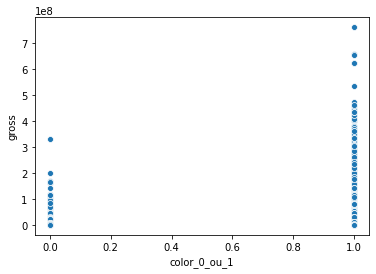

In [0]:
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")

Então plotamos nossos dados com um displot! Existem várias formas de visualizar essa informação, mas por ora essa nos ajuda a comparar os resultados. Repare como filmes coloridos tem valores bem maiores (isso já era até esperado), mas também temos pontos bem altos em filmes preto e branco, chamando muito atenção.

Vamos explorar algumas estatísticas destes filmes:

In [0]:
color_or_bw.groupby("color").mean()["gross"]

color
 Black and White   32,457,016.52
Color              49,026,187.22
Name: gross, dtype: float64

In [0]:
color_or_bw.groupby("color").mean()["imdb_score"]

color
 Black and White   7.23
Color              6.41
Name: imdb_score, dtype: float64

In [0]:
color_or_bw.groupby("color").median()["imdb_score"]

color
 Black and White   7.40
Color              6.50
Name: imdb_score, dtype: float64

Das estatísticas temos duas bem interessantes, a média e mediana das notas de filmes preto e branco são maiores. Há várias possíveis explicações sobre o porquê disso, reflita aí sobre algumas delas e compartilhe conosco!


A partir de agora, vamos fazer uma investigação melhor em relação às finanças dos filmes (faturamento e orçamento). Vamos iniciar plotando e interpretando um gráfico de **gross** por **budget**:

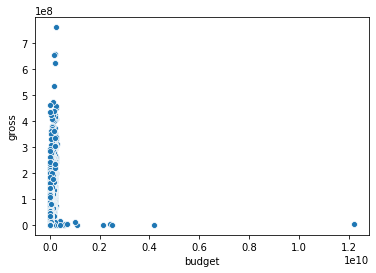

In [0]:
budget_gross=  imdb[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)

Para plotar os dados, primeiro removemos as linhas com informações de faturamento e orçamento vazias e também com valores igual a 0, para então gerar o gráfico.

Agora vamos analisar esse gráfico juntos, veja que a escala de **budget** mudou, agora é **e10**. Repare que apenas poucos filmes tem orçamentos tão grandes assim, e seus faturamentos são muito baixos. Será que temos algum problema nos dados? Vamos investigar melhor!

In [0]:
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.00,110.00,584.00,74.00,Kang-ho Song,629.00,"2,201,412.00",Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.00,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.00,Korean,South Korea,R,"12,215,500,000.00","2,006.00",398.00,7.00,1.85,7000
3859,Color,Chan-wook Park,202.00,112.00,0.00,38.00,Yeong-ae Lee,717.00,"211,667.00",Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.00,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.00,Korean,South Korea,R,"4,200,000,000.00","2,005.00",126.00,7.70,2.35,4000
3005,Color,Lajos Koltai,73.00,134.00,45.00,0.00,Péter Fancsikai,9.00,"195,888.00",Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.00,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.00,Hungarian,Hungary,R,"2,500,000,000.00","2,005.00",2.00,7.10,2.35,607
2323,Color,Hayao Miyazaki,174.00,134.00,"6,000.00",745.00,Jada Pinkett Smith,893.00,"2,298,191.00",Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.00,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.00,Japanese,Japan,PG-13,"2,400,000,000.00","1,997.00",851.00,8.40,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.00,103.00,78.00,101.00,Robin Atkin Downes,488.00,"410,388.00",Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.00,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.00,Japanese,Japan,PG-13,"2,127,519,898.00","2,004.00",336.00,6.90,1.85,973


Ordenando os dados pelo **budget** percebemos que as primeiras posições são de filmes asiáticos. O Guilherme trouxe um ponto interessante para a investigação, pois países como a Coreia usam moedas que tem três casas decimais a mais que o dólar. Então provavelmente o que está ocorrendo é que os dados de orçamento tem valores na moeda local, por isso detectamos valores tão discrepantes. 

Como não temos garantia dos números, vamos precisar trabalhar apenas com filmes americanos, assim garantimos que tanto gross e budget estão em dólares. Então vamos iniciar esse processo:

In [0]:
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

Veja que temos filmes de diversos locais de origem:

In [0]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
5,Color,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,"73,058,679.00",Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.00,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.00,English,USA,PG-13,"263,700,000.00","2,012.00",632.00,6.60,2.35,24000
7,Color,Nathan Greno,324.00,100.00,15.00,284.00,Donna Murphy,799.00,"200,807,262.00",Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.00,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.00,English,USA,PG,"260,000,000.00","2,010.00",553.00,7.80,1.85,29000
6,Color,Sam Raimi,392.00,156.00,0.00,"4,000.00",James Franco,"24,000.00","336,530,303.00",Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.00,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,"1,902.00",English,USA,PG-13,"258,000,000.00","2,007.00","11,000.00",6.20,2.35,0
3461,Color,Sam Raimi,392.00,156.00,0.00,"4,000.00",James Franco,"24,000.00","336,530,303.00",Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.00,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,"1,902.00",English,USA,PG-13,"258,000,000.00","2,007.00","11,000.00",6.20,2.35,0


Agora temos os dados para fazer uma análise melhor entre gross e budget. Vamos plotar o gráfico novamente:



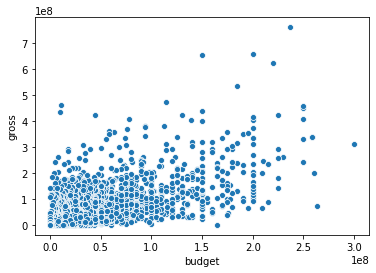

In [0]:
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)

Veja que interessante, aparentemente temos uma relação entre orçamento e faturamento. Quanto maior o orçamento, maior o faturamento.

Já que estamos trabalhando com orçamento e faturamento, podemos construir uma nova informação, o lucro, para analisar. De forma bem simplista esse processo de construir novas informações a partir das existentes no dataset é conhecido como [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


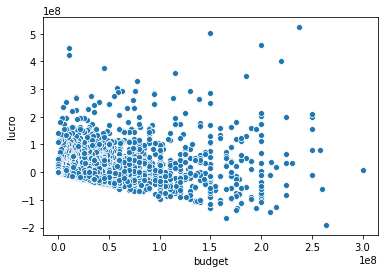

In [0]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

sns.scatterplot(x="budget", y="lucro", data = budget_gross)

MUito bom! Nós construímos nossa coluna lucro na base de dados e plotamos o orçamento contra lucro.

Repare que temos pontos interessantes nesta visualização, um deles são esses filmes com muito custo e prejuizo. Isso pode ser um prejuizo real, mas também podem ser filmes que ainda não tiveram tempo de recuperar o investimento (lançamentos recentes). Outros pontos interessantes de se anlisar seriam os filmes com baixos orçamentos e muito lucro, será que são estão corretos ou pode ser algum erro da base? Parece que nem sempre gastar uma tonelada de dinheiro vai gerar lucros absurdos, será que é isso é verdade? 

Esse gráfico é muito rico em informações, vale a pena você gastar um tempo criando hipóteses.

Já que essa nova feature (lucro) parace ser interessante de se analisar, vamos continuar! Mas agora quero ver o lucro em relação ao ano de produção:

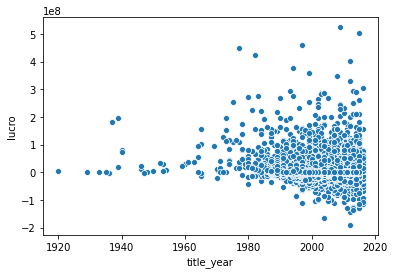

In [0]:
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

Olha que legal esse gráfico, veja como alguns pontos mais recentes reforça a teoria de que alguns filmes podem ainda não ter recuperado o dinheiro investido (Claro que temos muitas variáveis para se analisar, mas é um indício relevante).

Outro ponto que chama muito atenção, são os filmes da década de 30 e 40 com lucros tão altos. Quais serão esses filmes? Bom, essa pergunta você vai responder no desafio do Paulo, que está louco para descobrir!

Falando em Paulo, ele sugeriu uma análise com os nome dos diretores e o orçamento de seus filmes, vamos ver se conseguimos concluir alguma coisa:

In [0]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,"760,505,847.00",6.00
1,Gore Verbinski,"309,404,152.00",7.00
2,Christopher Nolan,"448,130,642.00",8.00
3,Andrew Stanton,"73,058,679.00",3.00
4,Sam Raimi,"336,530,303.00",11.00


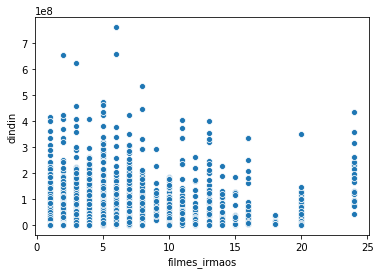

In [0]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

Essa imagem aparentemente não é muito conclusiva, então não conseguimos inferir tantas informações.

Esse processo de gerar dados, visualizações e acabar não sendo conclusivo é muito comum na vida de um cientista de dados, pode ir se acostumando =P.

Para finalizar, que tal realizar uma análise das correlações dos dados? EXistem várias formas de calcular a correlação, esse é um assunto denso.Você pode ler mais sobre essas métricas neste [link](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o).

Vamos então inciar a análise das correlações plotando o pairplot.

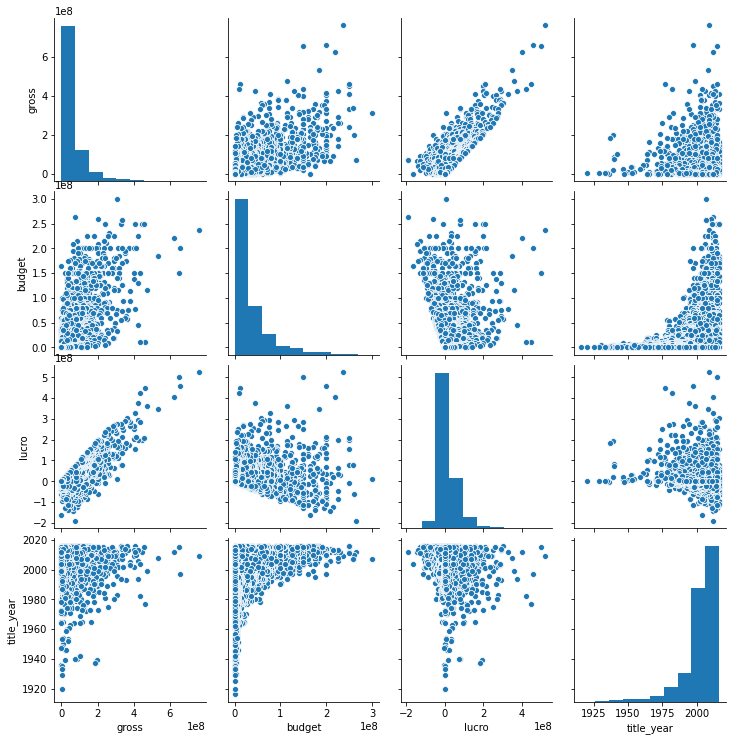

In [0]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

O pairplot mostra muita informação e a melhor forma de você entender é assistindo as conclusões que tiramos sobre esses gráficos na vídeoaula.

Embora plotamos um monte de informação, não necessariamente reduzimos a correlação em um número para simplificar a análise. Vamos fazer isso com a ajuda do `.corr()` do [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [0]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.00,0.65,0.80,0.03
budget,0.65,1.00,0.05,0.23
lucro,0.80,0.05,1.00,-0.12
title_year,0.03,0.23,-0.12,1.00


Com o pandas é simples de se calcular a correlação, mas precisamos saber interpretar os resultados. Vamos fazer isso?

A correlação é uma métrica que vai de 1 a -1. Quando a correlação é 1, dizemos que é totalmente correlacionada (relação linear perfeita e positiva), ou seja se uma variável aumenta em 10 a outra também irá aumentar em 10. Quando o valor da correlação é -1, também temos variáveis totalmente correlacionda, só que de maneira negativa (relação linear perfeita negativa), neste caso, se uma variável aumenta em 10 a outra reduz em 10. Agora quando a correlação é 0 temos a inexistência de correlação, ou seja, uma variável não tem influêcia sobre a outra. 

Agora sim, entendido sobre a correlação vamos analisar as nossas. Veja que lucro e gross tem uma correlação alta, o que indica que quanto maior o orçamento maior o lucro (mas repare que a correlação não é perfeita), já o title_yers e lucro tem correlação negativa, mas muito perto de zero (ou seja quase não tem correlação). Viu como conseguimos analisar muitas coisas com a correlação?! Pense e tente analisar os outros casos também.


Com isso chegamos ao final de mais uma aula da #quarentenadados. E aí, o que está achando, cada vez mais legal e ao mesmo tempo mais complexo né?

O que importa é estar iniciando e entendendo o que fazemos para analisar os dados! **Continue até o fim, garanto que vai valer a pena.**
Vamos praticar?

**Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês**.


Até a próxima aula!

**P.S: A partir de agora teremos muitos desafios envolvendo mais análises e conclusões, então não haverá um "gabarito". O importante é você compartilhar suas soluções com os colegas e debater os seus resultados e das outras pessoas**

## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

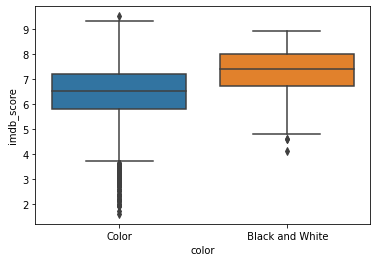

In [0]:
sns.boxplot(x='color', y='imdb_score', data=color_or_bw)

##Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [0]:
imdb_usa.sort_values('lucro').head(1)['movie_title']

5    John Carter 
Name: movie_title, dtype: object

##Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)


Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [0]:
imdb_usa.query('budget > 0 and gross > 0').sort_values('title_year', ascending=False).head(20)[['movie_title', 'lucro', 'title_year']]

,movie_title,lucro,title_year
163,Gods of Egypt,"-108,858,926.00","2,016.00"
2549,The Young Messiah,"-12,037,424.00","2,016.00"
2404,My Big Fat Greek Wedding 2,"41,573,085.00","2,016.00"
244,The Huntsman: Winter's War,"-67,047,980.00","2,016.00"
1742,The Boss,"34,034,755.00","2,016.00"
73,Suicide Squad,"-13,912,817.00","2,016.00"
150,Ghostbusters,"-25,900,341.00","2,016.00"
154,Kung Fu Panda 3,"-1,476,537.00","2,016.00"
65,X-Men: Apocalypse,"-23,014,913.00","2,016.00"
567,The Angry Birds Movie,"34,225,164.00","2,016.00"


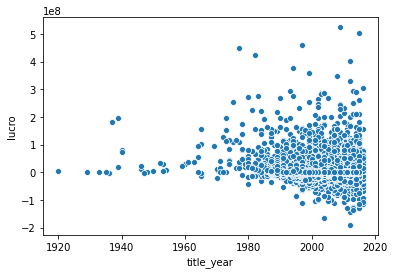

In [0]:
lucro_year = imdb_usa[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data=lucro_year)

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [0]:
pre_war = imdb_usa.query('title_year < 1940').sort_values('lucro', ascending=False).dropna()
pre_war[['movie_title', 'lucro']].head(2)

,movie_title,lucro
3970,Gone with the Wind,"194,678,278.00"
4449,Snow White and the Seven Dwarfs,"182,925,485.00"


## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [0]:
gross_director.drop_duplicates('director_name').query('filmes_irmaos == 18')

,director_name,dindin,filmes_irmaos
1538,Woody Allen,"7,496,522.00",18.00


## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

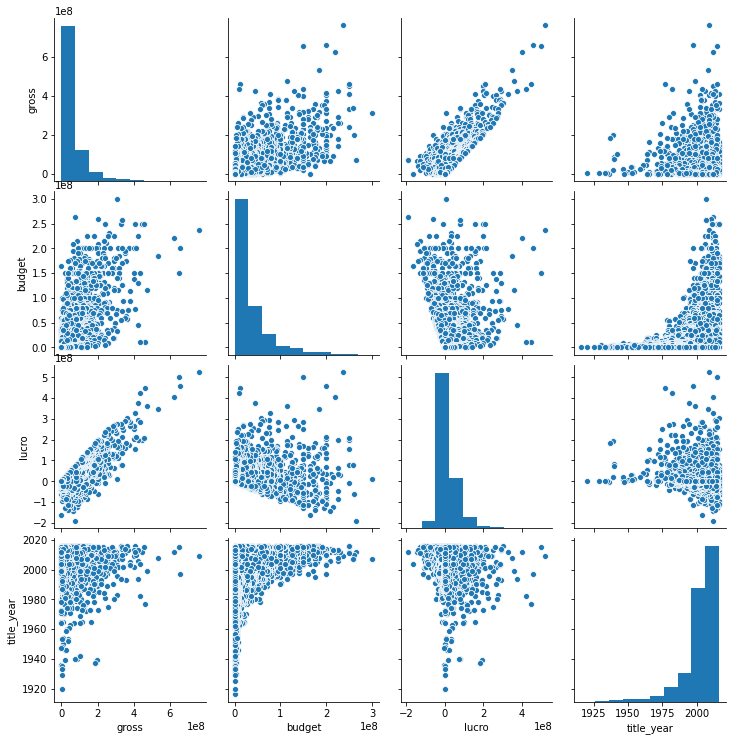

In [0]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

Conseguimos perceber aqui que as variavéis que melhor se correlacionam são lucro x gross e as que menos se correlacionam são gross x title_year

In [0]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.00,0.65,0.80,0.03
budget,0.65,1.00,0.05,0.23
lucro,0.80,0.05,1.00,-0.12
title_year,0.03,0.23,-0.12,1.00


Aqui vimos que a análise acima esta correta lucro x gross tem uma correlação de aproximadamente 0.79 e gross x title_year 0.03


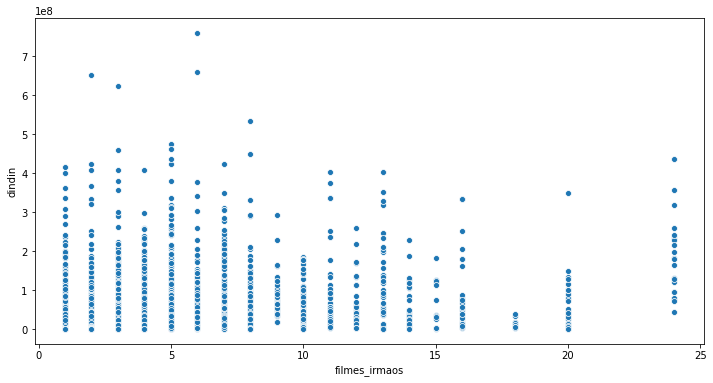

In [0]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="filmes_irmaos", y="dindin", data=gross_director)

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

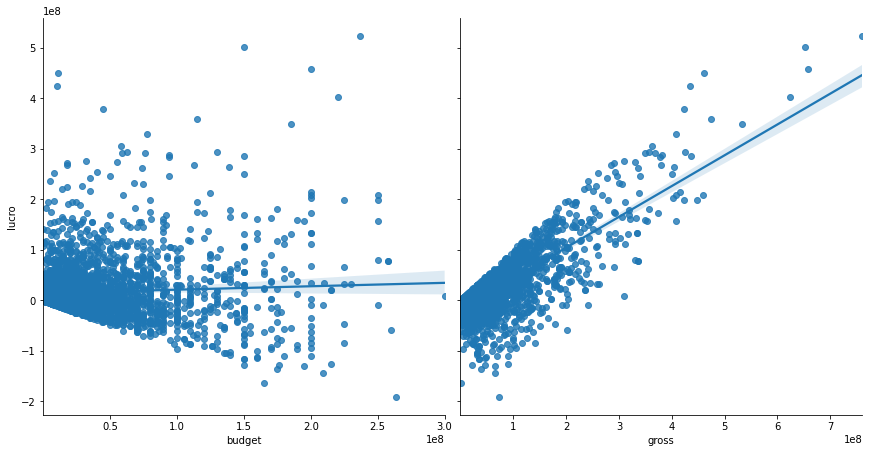

In [0]:
sns.pairplot(imdb_usa, y_vars='lucro', x_vars=['budget', 'gross'], height=6, kind='reg')

## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

In [0]:
imdb_usa[["gross", "budget", "imdb_score"]].corr()

,gross,budget,imdb_score
gross,1.00,0.65,0.26
budget,0.65,1.00,0.08
imdb_score,0.26,0.08,1.00


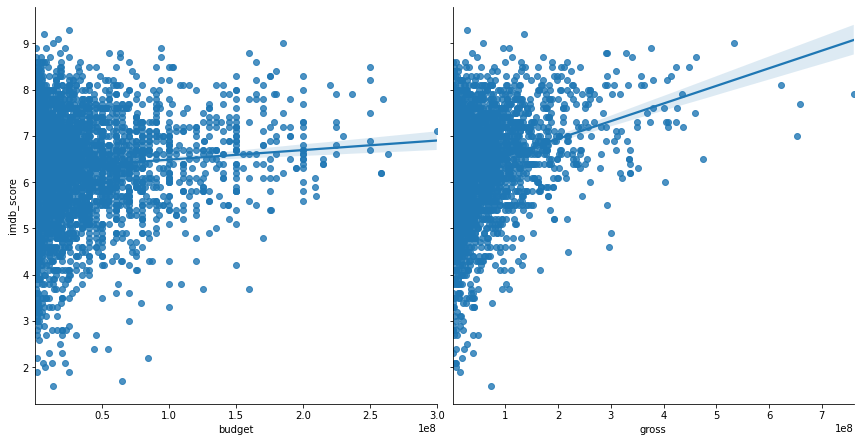

In [0]:
sns.pairplot(imdb_usa, y_vars='imdb_score', x_vars=['budget', 'gross'], height=6, kind='reg')

In [0]:
votos_por_ano = imdb_usa.groupby('title_year')['num_voted_users'].mean()
imdb_usa_votos_por_ano = imdb_usa.join(votos_por_ano, on='title_year', rsuffix='rs')
imdb_usa_votos_por_ano.rename(columns={'num_voted_usersrs': 'votos_por_ano'}, inplace=True)
imdb_usa_votos_por_ano.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro,votos_por_ano
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000,"523,505,847.00","90,459.21"
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0,"9,404,152.00","105,898.24"
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000,"198,130,642.00","116,836.91"
5,Color,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,"73,058,679.00",Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.00,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.00,English,USA,PG-13,"263,700,000.00","2,012.00",632.00,6.60,2.35,24000,"-190,641,321.00","116,836.91"
6,Color,Sam Raimi,392.00,156.00,0.00,"4,000.00",James Franco,"24,000.00","336,530,303.00",Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.00,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,"1,902.00",English,USA,PG-13,"258,000,000.00","2,007.00","11,000.00",6.20,2.35,0,"78,530,303.00","105,898.24"


In [0]:
imdb_usa_votos_por_ano[['title_year', 'votos_por_ano']].corr()

,title_year,votos_por_ano
title_year,1.00,0.14
votos_por_ano,0.14,1.00


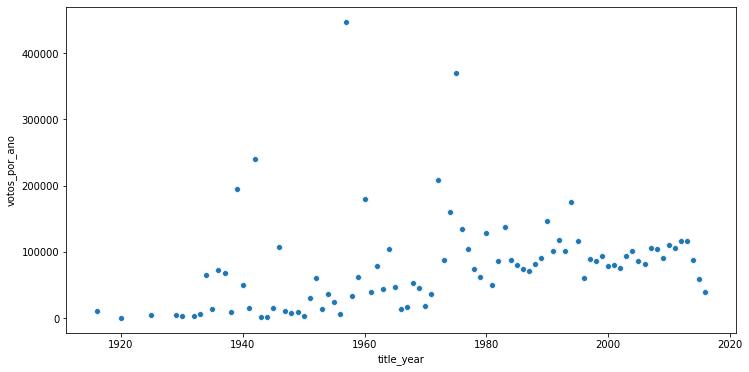

In [0]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='title_year', y='votos_por_ano', data=imdb_usa_votos_por_ano)

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


In [0]:
imdb_usa.keys()

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'lucro'],
      dtype='object')

In [0]:
imdb_maior_que_2000 = imdb_usa.query('title_year > 2000')[['num_voted_users', 'num_user_for_reviews', 'imdb_score', 'num_critic_for_reviews']].corr()
imdb_maior_que_2000

,num_voted_users,num_user_for_reviews,imdb_score,num_critic_for_reviews
num_voted_users,1.00,0.80,0.46,0.73
num_user_for_reviews,0.80,1.00,0.33,0.63
imdb_score,0.46,0.33,1.00,0.45
num_critic_for_reviews,0.73,0.63,0.45,1.00


dentre as variáveis analisadas as que apresentaram maiores correlações entre elas foram num_voted_users x num_user_for_reviews com índice de correlação de 79% e num_voted_users x num_critic_for_reviews com um índice 72%. A relação de votos com quantidade de reviews de usários era esperada, já que, parte dos usuários que votam também avaliam o filme. Já o número de críticas é independente e imagino que deve influenciar de alguma forma o público de usuários do IMDB talvez sendo a ponte de entrada para avaliação, enfim apenas uma hipótese.



# Aula 04

# Introdução


Olá, seja bem-vinda e bem-vindo ao notebook da **aula 04!** A partir desta aula iremos analisar e discutir um *sample* da base de dados do **ENEM 2018**. Nessa aula vamos falar sobre diversos temas importantes na área de IA, então **acompanhar esses explicações pela videoaula será importante para o seu desenvolvimento**.

Aqui iremos explorar e conhecer uma pequena amostra da base de dados do **ENEM 2018**. Esse será o primeiro passo para construir os **modelos de machine learning da aula 05**. Se você quiser estudar o código utilizado para criar o dataset desta aula, pode acessar este [**link aqui**](https://github.com/guilhermesilveira/enem-2018).

Vamos iniciar setando a precisão de casas decimais que o pandas irá exibir os dados (`pd.options.display.float_format`), depois lendo e conhecendo as informações contidas na base de dados.


In [0]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


Conheça todas as colunas do nosso dataframe:

In [0]:
print(dados.columns.values)

Na videoaula tivemos uma discussão muito bacana sobre uma visão geral dos dados e sua organização, e sobre ética na IA. Se você não assistiu eu recomendo que veja, não cabe aqui no notebook reproduzir a conversa, então vamos seguir com o  desenvolvimento.


Conhecidas as informações, vamos chamar o **describe()** para analisá-las. Se atente ao detalhe que o **describe** só gera informação de dados numéricos!

In [0]:
dados.describe()

A saída do `describe` traz várias estatísticas, de forma que algumas não fazem sentido ou não nos interessam neste momento.  Entretanto, se você analisou as últimas colunas, viu que lá temos alguns dados relevantes: notas das provas e redação. 

Desafio você a entrar nos detalhes das análises de notas e diversos outros campos! Como nosso tempo aqui é restrito, vamos analisar apenas as notas entre si, mas reflita: Será que existe uma correlação entre as notas? Quem tira notas maiores em redação também vai bem em linguagens?

Vamos analisar!

In [0]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [0]:
len(dados_notas)

Como queremos analisar as notas detalhadamente, no código acima separamos apenas os dados de interesse. Também removemos todos os valores vazios com o `.dropna()` e trocamos os nomes das colunas para ficar mais legível. 

Por fim, agora nosso DF tem 97270 linhas e 5 colunas.

Agora sim, vamos calcular a correlação usando o `.corr()`:

In [0]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Temos vários resultados interessantes por aqui: o primeiro é uma correlação considerável entre **linguagem_codigo e ciencias_humanas**, o que parece fazer sentido. Uma correlação que surpreende é entre **linguagem_codigo e redacao**. Embora haja uma correlação maior em relação às outras matérias e redação, eu esperava um valor ainda maior do que o existente. 

**Mais alguma correlação te chama a atenção? **

Eu tenho mais uma análise das correlações em geral! Repare que as correlações com linguagem_codigos sempre são as maiores e isso me faz pensar em várias hipóteses!

Será que se eu estudar mais português vou ter um desempenho melhor nas outras matérias? (lembre-se que o ENEM é uma prova que demanda interpretação de texto, então essa prerrogativa pode fazer sentido).
Será que se eu considerar provas de anos anteriores e comparar as correlações com linguagem_códigos elas serão maiores?

A verdade é que uma simples análise de correlação nos gera diversas hipóteses. **Se tiver curiosidade e quiser fazer essas análises fica como um desafio extra!**

Na videoaula você viu que tentamos plotar diversos gráficos para visualizar a correlação de uma melhor forma. Abaixo seguem os códigos usados:

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
sns.heatmap(corr)

Depois de apanhar tentando criar boas imagens, resolvemos deixar esse desafio para você kkkkk... Resolva e dê aquela cornetada em nosso time uahuahha...

Ok, nós analisamos e conhecemos a base de dados, mas no final o que vou querer é construir um modelo de ML para fazer as predições de algumas notas. Para criar esse modelo de machine learning devemos analisar a distribuição dos nossos dados e verificar se existe alguma tendência entre eles, facilitando o processo preditivo. 

Então, vamos ao **pairplot**:

In [0]:
sns.pairplot(dados_notas)

Embora existam alguns dados com maior dispersão, outros parecem obedecer uma certa tendência. Dessa forma, desenvolver um modelo de ML com resultados razoáveis será complexo, porém possível (para detalhes das análises, acompanhe a discussão na videoaula).

Com isso chegamos ao final de mais uma aula da #quarentenadados. E aí, o que está achando?

Agora iremos entrar em uma área totalmente nova: o desenvolvimento de modelos de machine learning! Espero que você esteja empolgado(a) para conhecer um pouquinho mais sobre esse assunto!

Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para você.

Até a próxima aula!


P.S: A partir de agora você irá colocar a mão na massa, nossos desafios serão mais analítcos. Queremos que você vivencie o dia-a-dia de um ciêntista de dados, discutindo suas conclusões no Slack e estudando as análises de outros colegas, por isso não haverá gabarito.

## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [34]:
# Dados do dicionário do ENEM
faltou = 0
presente = 1
eliminado = 2

dados_nota = dados.copy()

dados_nota.loc[dados['TP_PRESENCA_CN'].isin([faltou, eliminado]), 'NU_NOTA_CN'] = 0 # dados[dados['TP_PRESENCA_CN'] == presente]['NU_NOTA_CN'].mean()
dados_nota.loc[dados['TP_PRESENCA_CH'].isin([faltou, eliminado]), 'NU_NOTA_CH'] = 0
dados_nota.loc[dados['TP_PRESENCA_LC'].isin([faltou, eliminado]), 'NU_NOTA_LC'] = 0
dados_nota.loc[dados['TP_PRESENCA_MT'].isin([faltou, eliminado]), 'NU_NOTA_MT'] = 0

dados_nota[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00
2,409.20,531.70,389.00,438.10
3,452.30,505.50,448.50,544.90
4,0.00,0.00,0.00,0.00


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

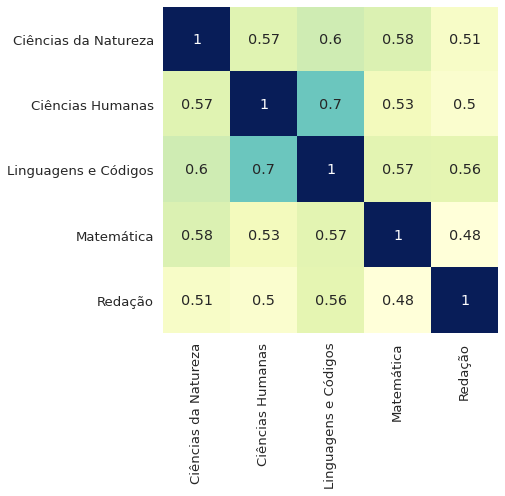

In [35]:
sns.set(font_scale=1.2)

labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

plt.figure(figsize=(6, 6))
ax = sns.heatmap(
    corr,
    annot=True,
    cmap="YlGnBu",
    cbar=False,
    xticklabels=labels,
    yticklabels=labels,
    # mask=np.triu(np.ones_like(corr, dtype=np.bool))
)

plt.show()

# Reseta as configurações para o padrão
sns.set()

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [0]:
def conta_acertos(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')

    if (type(respostas) != str or type(gabarito) != str):
        return 0

    return sum(a==b for a, b in zip(respostas, gabarito))

In [0]:
dados_nota_2 = dados_nota.copy()

# dados_nota_2.dropna(subset=['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT'], inplace=True)

dados_nota_2['NU_RESPOSTAS_CORRETAS_CN'] = dados_nota_2.apply(conta_acertos, materia='CN', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_CH'] = dados_nota_2.apply(conta_acertos, materia='CH', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_LC'] = dados_nota_2.apply(conta_acertos, materia='LC', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_MT'] = dados_nota_2.apply(conta_acertos, materia='MT', axis=1)

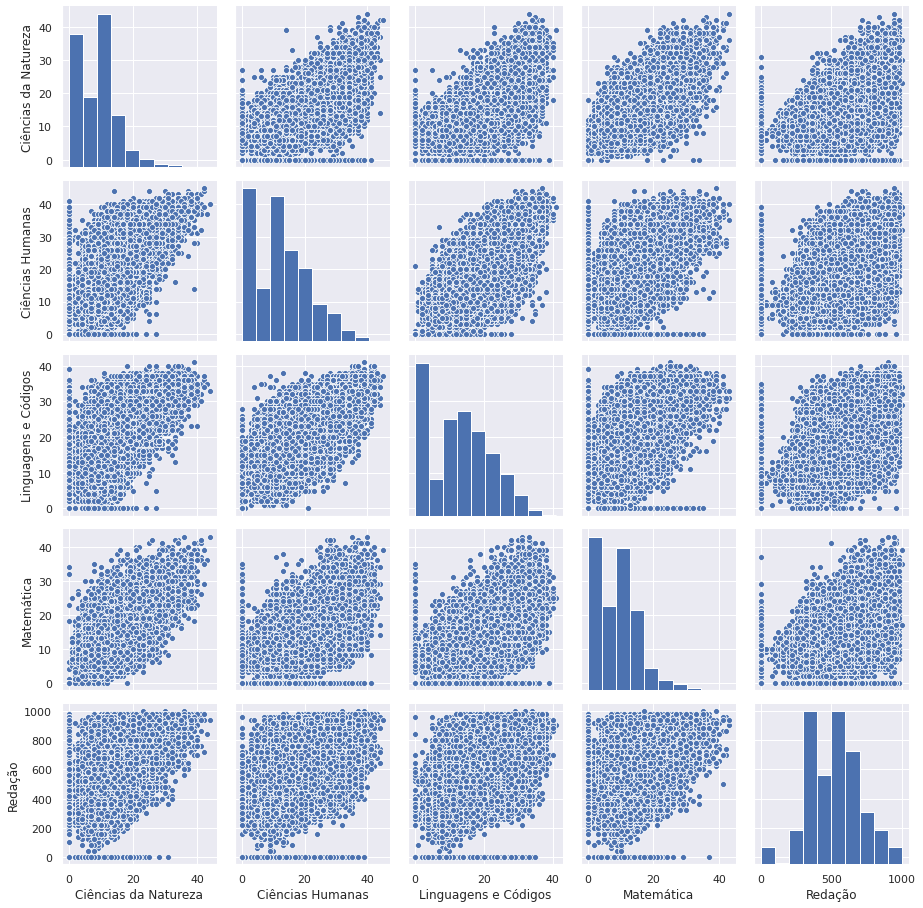

In [38]:
num_questoes_acertadas = dados_nota_2[['NU_RESPOSTAS_CORRETAS_CN', 'NU_RESPOSTAS_CORRETAS_CH', 'NU_RESPOSTAS_CORRETAS_LC', 'NU_RESPOSTAS_CORRETAS_MT', 'NU_NOTA_REDACAO']]
num_questoes_acertadas.columns = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

sns.set()
sns.pairplot(num_questoes_acertadas)

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [39]:
# Seguindo a dica da Thais
import numpy as np

dados_nota_sem_0 = dados_nota_2.copy()

# dados_nota_sem_0['NU_RESPOSTAS_CORRETAS_CN'] = dados_nota_2['NU_RESPOSTAS_CORRETAS_CN'].replace(0, None)
# dados_nota_sem_0['NU_RESPOSTAS_CORRETAS_CH'] = dados_nota_2['NU_RESPOSTAS_CORRETAS_CH'].replace(0, None)
# dados_nota_sem_0['NU_RESPOSTAS_CORRETAS_LC'] = dados_nota_2['NU_RESPOSTAS_CORRETAS_LC'].replace(0, None)
# dados_nota_sem_0['NU_RESPOSTAS_CORRETAS_MT'] = dados_nota_2['NU_RESPOSTAS_CORRETAS_MT'].replace(0, None)

dados_nota_sem_0['NU_NOTA_CN'] = dados_nota_2['NU_NOTA_CN'].replace(0., np.NAN)
dados_nota_sem_0['NU_NOTA_CH'] = dados_nota_2['NU_NOTA_CH'].replace(0., np.NAN)
dados_nota_sem_0['NU_NOTA_LC'] = dados_nota_2['NU_NOTA_LC'].replace(0., np.NAN)
dados_nota_sem_0['NU_NOTA_MT'] = dados_nota_2['NU_NOTA_MT'].replace(0., np.NAN)

dados_nota_sem_0.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], inplace=True)

dados_nota_sem_0[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
1,523.10,671.30,661.60,738.00
2,409.20,531.70,389.00,438.10
3,452.30,505.50,448.50,544.90
6,428.50,505.20,521.00,436.80
8,491.80,575.70,524.40,487.60


## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [0]:
def corrige_questoes(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')
    
    return pd.Series([int(a==b) for a, b in zip(respostas, gabarito)])

In [42]:
# Analisando a prova azul de Ciências da Natureza
prova_cn_azul = dados.query('CO_PROVA_CN == 447')

matriz_acertos = prova_cn_azul.apply(corrige_questoes, materia='CN', axis=1)
matriz_acertos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
10,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
15,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
137808,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0
137821,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0
137834,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


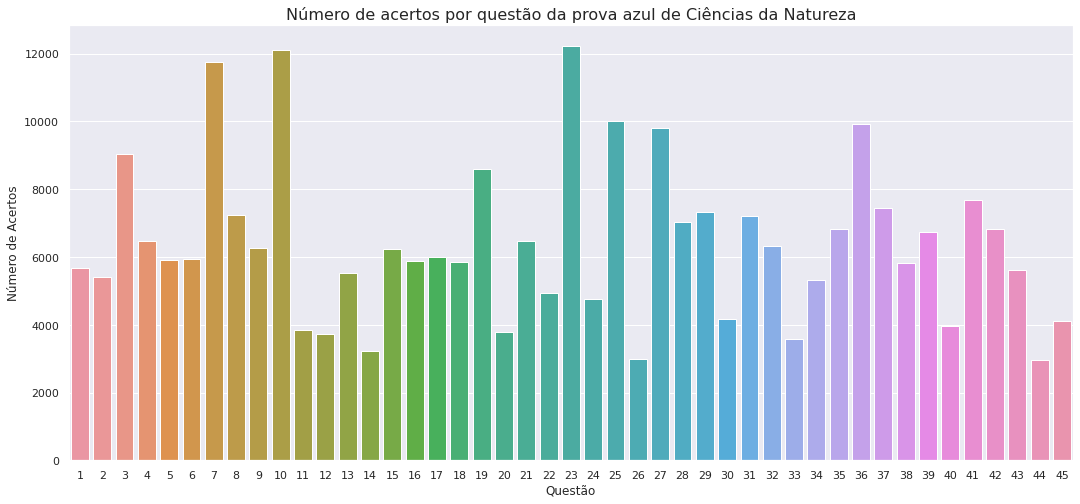

In [43]:
total_acertos_por_questao = pd.DataFrame(matriz_acertos.sum())
total_acertos_por_questao.reset_index(inplace=True)
total_acertos_por_questao.columns = ['Questão', 'Número de Acertos']
total_acertos_por_questao['Questão'] = total_acertos_por_questao['Questão'] + 1

plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Questão', y='Número de Acertos', data=total_acertos_por_questao)

ax.set_title('Número de acertos por questão da prova azul de Ciências da Natureza', fontsize=16)

plt.show()

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

# Aula 04 revisão para iniciar a 5

# Introdução


Olá, seja bem-vinda e bem-vindo ao notebook da **aula 05!** Essa será nossa última aula no #QuarentenaDados, por isso chegou a hora de criar seu primeiro modelo de **Machine Learning** em nosso curso. Nessa aula tivemos diversos debates importantes na videoaula, então **acompanhar as explicações por meio dela será importante para o seu desenvolvimento**.

Antes de começar a aula 5 execute os códigos da aula 04, pois será necessário para essa aula. Feita a execução, vá até o índice Alura 5 e bons estudos!

In [0]:
x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x_4_notas.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


#Aula 4

Aqui iremos explorar e conhecer uma pequena amostra da base de dados do **ENEM 2018**. Esse será o primeiro passo para construir os **modelos de machine learning da aula 05**. Se você quiser estudar o código utilizado para criar o dataset desta aula, pode acessar este [**link aqui**](https://github.com/guilhermesilveira/enem-2018).

Vamos iniciar setando a precisão de casas decimais que o pandas irá exibir os dados (`pd.options.display.float_format`), depois lendo e conhecendo as informações contidas na base de dados.



In [0]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


Conheça todas as colunas do nosso dataframe:

In [0]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

Na videoaula tivemos uma discussão muito bacana sobre uma visão geral dos dados e sua organização, e sobre ética na IA. Se você não assistiu eu recomendo que veja, não cabe aqui no notebook reproduzir a conversa, então vamos seguir com o  desenvolvimento.


Conhecidas as informações, vamos chamar o **describe()** para analisá-las. Se atente ao detalhe que o **describe** só gera informação de dados numéricos!

In [0]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

A saída do `describe` traz várias estatísticas, de forma que algumas não fazem sentido ou não nos interessam neste momento.  Entretanto, se você analisou as últimas colunas, viu que lá temos alguns dados relevantes: notas das provas e redação. 

Desafio você a entrar nos detalhes das análises de notas e diversos outros campos! Como nosso tempo aqui é restrito, vamos analisar apenas as notas entre si, mas reflita: Será que existe uma correlação entre as notas? Quem tira notas maiores em redação também vai bem em linguagens?

Vamos analisar!

In [0]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [0]:
len(dados_notas)

97270

Como queremos analisar as notas detalhadamente, no código acima separamos apenas os dados de interesse. Também removemos todos os valores vazios com o `.dropna()` e trocamos os nomes das colunas para ficar mais legível. 

Por fim, agora nosso DF tem 97270 linhas e 5 colunas.

Agora sim, vamos calcular a correlação usando o `.corr()`:

In [0]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Temos vários resultados interessantes por aqui: o primeiro é uma correlação considerável entre **linguagem_codigo e ciencias_humanas**, o que parece fazer sentido. Uma correlação que surpreende é entre **linguagem_codigo e redacao**. Embora haja uma correlação maior em relação às outras matérias e redação, eu esperava um valor ainda maior do que o existente. 

**Mais alguma correlação te chama a atenção? **

Eu tenho mais uma análise das correlações em geral! Repare que as correlações com linguagem_codigos sempre são as maiores e isso me faz pensar em várias hipóteses!

Será que se eu estudar mais português vou ter um desempenho melhor nas outras matérias? (lembre-se que o ENEM é uma prova que demanda interpretação de texto, então essa prerrogativa pode fazer sentido).
Será que se eu considerar provas de anos anteriores e comparar as correlações com linguagem_códigos elas serão maiores?

A verdade é que uma simples análise de correlação nos gera diversas hipóteses. **Se tiver curiosidade e quiser fazer essas análises fica como um desafio extra!**

Na videoaula você viu que tentamos plotar diversos gráficos para visualizar a correlação de uma melhor forma. Abaixo seguem os códigos usados:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


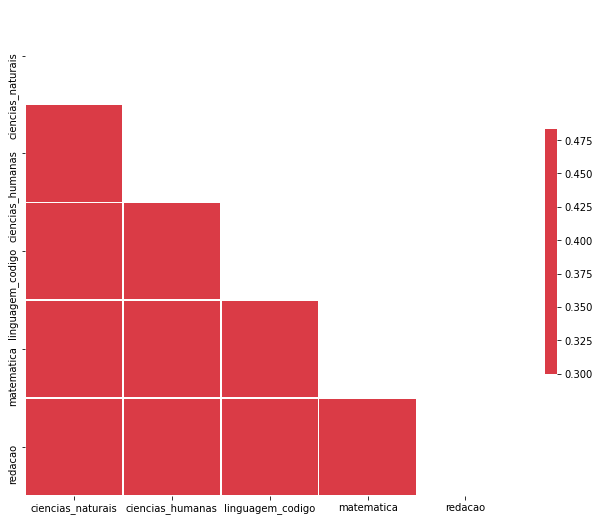

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

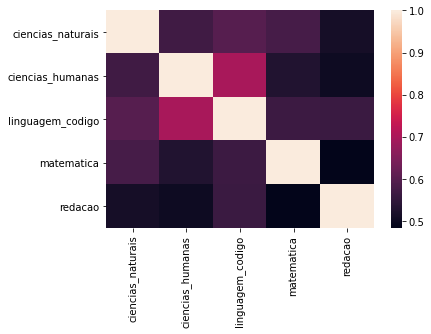

In [0]:
sns.heatmap(corr)

Depois de apanhar tentando criar boas imagens, resolvemos deixar esse desafio para você kkkkk... Resolva e dê aquela cornetada em nosso time uahuahha...

Ok, nós analisamos e conhecemos a base de dados, mas no final o que vou querer é construir um modelo de ML para fazer as predições de algumas notas. Para criar esse modelo de machine learning devemos analisar a distribuição dos nossos dados e verificar se existe alguma tendência entre eles, facilitando o processo preditivo. 

Então, vamos ao **pairplot**:

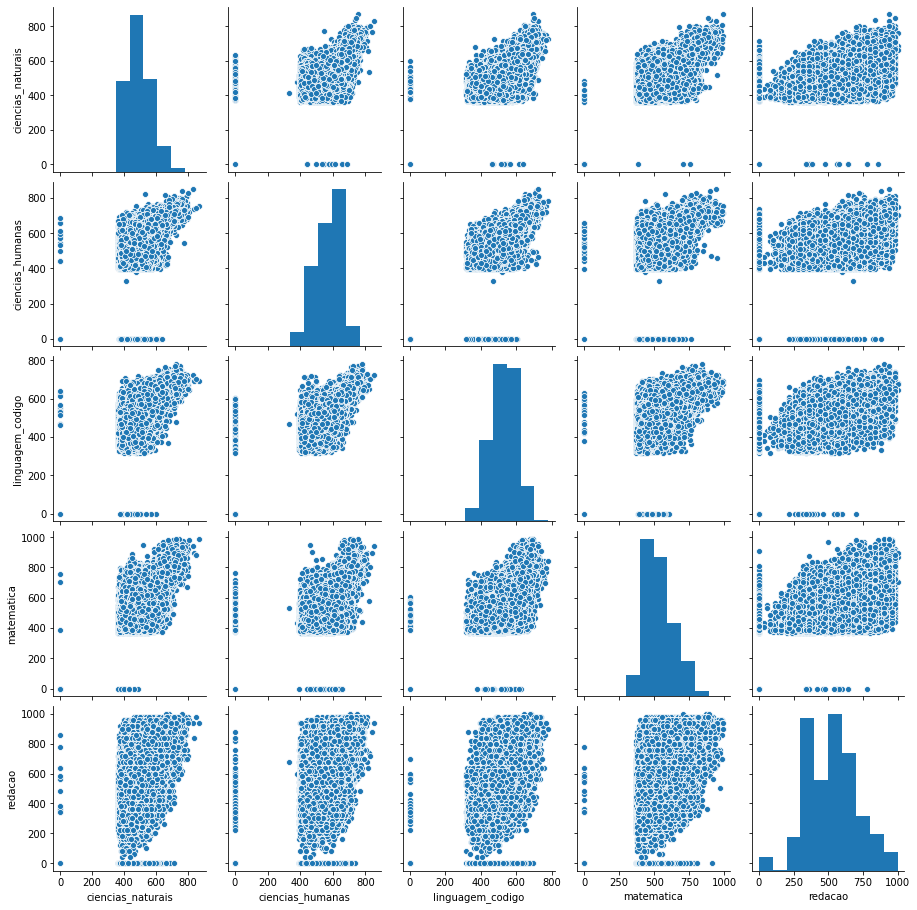

In [0]:
sns.pairplot(dados_notas)

Embora existam alguns dados com maior dispersão, outros parecem obedecer uma certa tendência. Dessa forma, desenvolver um modelo de ML com resultados razoáveis será complexo, porém possível (para detalhes das análises, acompanhe a discussão na videoaula).

Com isso chegamos ao final de mais uma aula da #quarentenadados. E aí, o que está achando?

Agora iremos entrar em uma área totalmente nova: o desenvolvimento de modelos de machine learning! Espero que você esteja empolgado(a) para conhecer um pouquinho mais sobre esse assunto!

Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para você.

Até a próxima aula!


P.S: A partir de agora você irá colocar a mão na massa, nossos desafios serão mais analítcos. Queremos que você vivencie o dia-a-dia de um ciêntista de dados, discutindo suas conclusões no Slack e estudando as análises de outros colegas, por isso não haverá gabarito.

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

# Aula 5

Nessa aula discutiremos o que é o processo de classificação e como as máquinas podem aprender esse processo. Após essa discussão iniciaremos o tratamento dos dados para criar nosso primeiro modelo de ML.

A primeira coisa que devemos fazer é separar os dados que vamos usar como entrada do nosso modelo, dos que precisamos prever:

In [0]:
x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x_4_notas.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


Vamos usar as notas das provas de ciências naturais, ciências humanas, matemática e redação para prever as notas da prova de linguagem e códigos. 

Como separamos os dados de entrada, também devemos fazer o mesmo com aqueles que precisamos adivinhar.

In [0]:
y_adivinhar = dados_notas['linguagem_codigo']
y_adivinhar

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

Agora temos os dados que precisamos classificar, mas repare que essa é toda nossa informação! Se eu treinar um modelo com todos esses dados, como eu vou conseguir medir a qualidade do modelo? 

Por isso precisamos dividir nossos dados em dois grupos, um para treino e outro para teste.

Para fazer isso vamos usar métodos da biblioteca Scikit-learn, ela é uma das principais ferramentas no mundo do Machine Learning! Vale conferir e estudar um pouco mais sobre ela, aqui está o [link para a documentação](https://scikit-learn.org/stable/).

Além do Sklearn, iremos utilizar o numpy para setar o seed dos números pseudo-aleatórios.

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)

# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [0]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
30213,524.70,509.30,496.90,620.00
83439,501.40,609.00,532.00,460.00
56490,544.40,649.60,592.80,560.00
135214,415.70,541.20,461.60,560.00
55431,405.50,592.00,571.60,520.00


Feita a divisão dos nossos dados, chegou a hora de criar seu primeiro modelo de Regressão(Em aula discutimos a diferença entre regressão e classificação).

Vamos utilizar o LinearSVR do scikit-learn:

In [0]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Até o momento nós treinamos o modelo apenas com o `.fit()`, mas falta fazer a predição dos resultados. Para realizar a predição chamamos o método `.predict()` do **modelo**.

In [0]:
predicoes_notas_linguagem = modelo.predict(x_teste)
predicoes_notas_linguagem[:5]

array([486.66331109, 540.37793322, 478.79488436, 452.0140805 ,
       533.06419739])

Compare a saída da predição com os valores reais logo abaixo, parece que está fazendo sentido, certo?!

In [0]:
y_teste[:5]

41528   420.20
81918   545.60
22786   518.10
17935   539.20
70617   536.90
Name: linguagem_codigo, dtype: float64

Nos próximos trechos de códigos vamos plotar alguns gráficos! As discussões e todas as análises sobre estas visualizações foram feitas de forma muito rica na videoaula, portanto recomendo fortemente acompanhá-las.

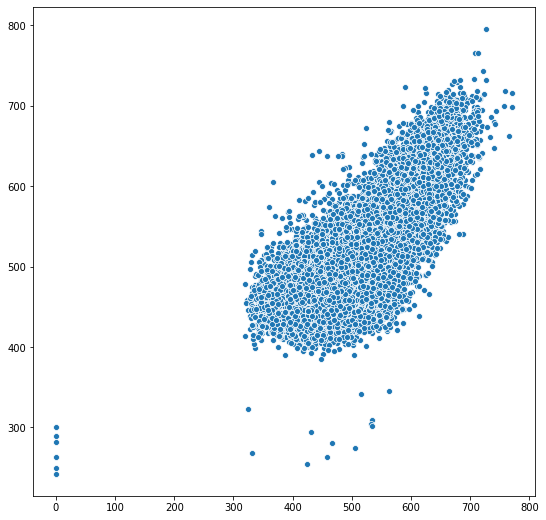

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

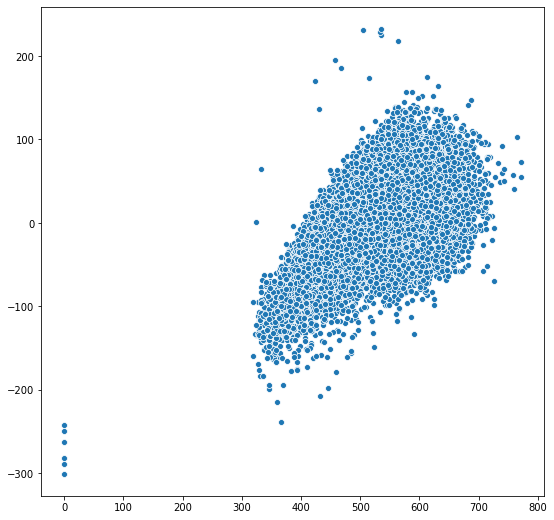

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_linguagem)

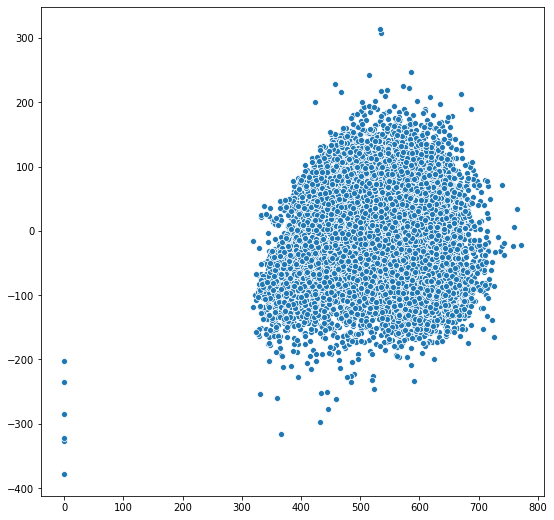

In [0]:
import matplotlib.pyplot as plt

# minha predição TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - x_teste.mean(axis=1))


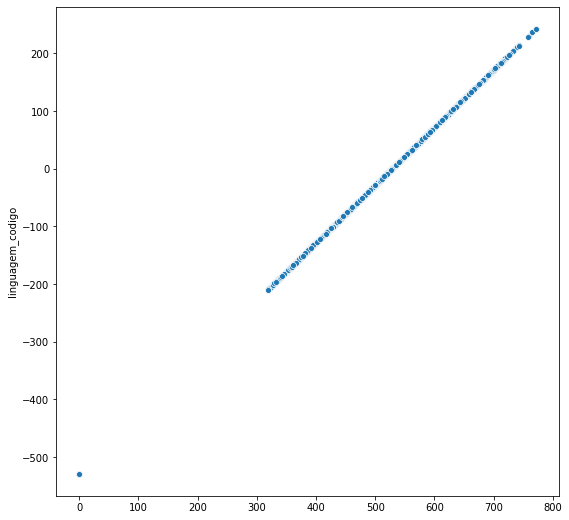

In [0]:
import matplotlib.pyplot as plt

# predição do paulo TOSCA. Dummy!
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - y_treino.mean())


Após discutir esses gráficos, vamos criar mais um modelo de **machine learning** basededo em "árvores":

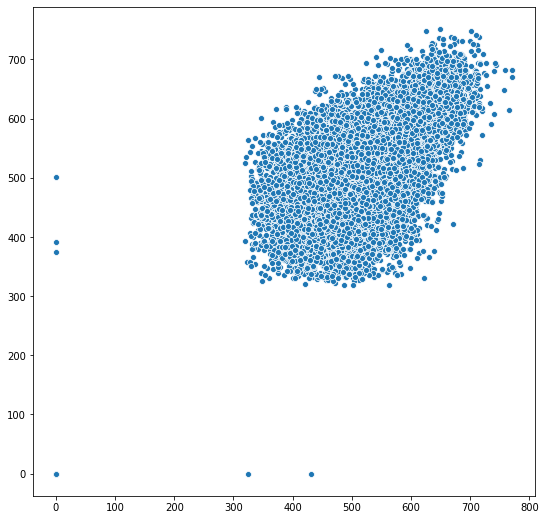

In [0]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

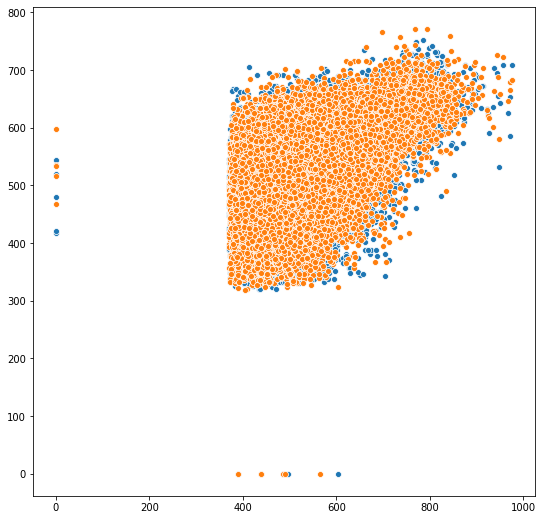

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

Após treinar o modelo e fazer as predições, plotamos duas imagens. A primeira é muito parecida com as os gráficos do primeiro classificador, mas a segunda mostra os valores reais e valores previstos!

Essa figura é muito interessante e mostra uma sobreposição muito boa entre elas, indicando que nossos resultados fazem sentido.

Avaliar os modelos por imagens é uma forma relevante, mas não resume a informação muito bem, por isso ficaria complexo avaliar dois ou três modelos apenas com gráficos.

O que precisamos agora é de uma métrica capaz de nos dizer como nosso modelo está indo, aqui vamos usar o [erro quadrático médio](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio). Existem centenas de métricas de avaliação, tudo vai depender do que você precisa e o que você está prevendo. 

In [0]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, predicoes_notas_linguagem)

4134.88

Veja que nosso erro quadrático médio deu em torno dos 4186.22. Embora pelo gráfico nosso modelo pareça muito bom, pela métrica parece ser um pouco alto.

O MSE, sigla em inglês para essá métrica, é uma medida que quanto mais perto de zero melhor. Veja o resultado quando calculamos o MSE de dois vetores iguais:

In [0]:
mean_squared_error(y_teste, y_teste)

0.00

Nosso resultado é zero! 
Você deve estar se perguntando: meu modelo não está nem perto de zero, será que ele é tão ruim assim?

Nós ainda não temos como te dar essa resposta, precisamos de um critério comparativo, pois assim conseguimos dizer como nosso modelo está indo. Por exemplo, que tal classificar os nossos dados de uma maneira "bobinha"? Para isso temos os chamados métodos **Dummy**.

In [0]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5193.54

Finalmente conseguimos responder se nosso modelo é tão ruim assim! Na realidade nosso modelo não é um dos melhores, temos muito o que melhorar, mas já somos melhores que uma classificação ingênua. 

Com isso, encerramos nossa última aula. Espero que vocês tenham gostado! 

Participem também do nosso **desafio final, valendo um Nintendo Switch**.

Bons estudos e boa sorte!

Forte abraço!

## Desafio 1 da [Allan Spadini](https://twitter.com/allanspadini)

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

No gráfico em que plotamos a média com o valor previsto, plote a média das 4 notas ao invés de uma.

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Remover as notas zero e testar os mesmos modelos, comparando o resultado

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Interpretar tudo que foi feito e compartilhar suas conclusões

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.